In [2]:
import pandas as pd
import seaborn as sns
dataset=pd.read_csv("Reviews.csv")[:10000]

In [181]:
index = dataset["UserId"].value_counts().index

In [267]:
reviewers = dataset.groupby(['UserId','ProfileName']).size().sort_values(ascending=False).reset_index(name='Score Count')

In [265]:
k =[]
for i in index:
    k.append(sector.get_group(i)["Score"].mean())
reviewers['means']=k


In [266]:
reviewers.head(5)

,UserId,ProfileName,Score Count,means
0,A1Z54EM24Y40LL,c2,17,3.882353
1,A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
2,A35R32TA60XD57,M. Torma,9,4.111111
3,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
4,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.714286


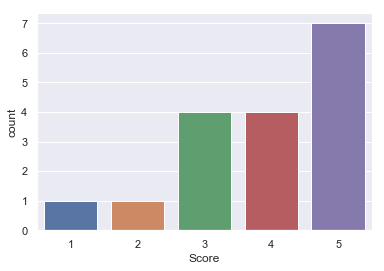

In [274]:
scores = sector.get_group(index[0])["Score"]
sns.set()
sns.countplot(scores)

In [432]:
read = dataset['Time'].sort_values(ascending=True)/525600
from collections import defaultdict
from bisect import bisect_left

def count_intervals(sequence, intervals):
    count = defaultdict(int)
    intervals.sort()
    for item in sequence:
        pos = bisect_left(intervals, item)
        if pos == len(intervals):
            count[None] += 1
        else:
            count[intervals[pos]] += 1
    return count
k = [i for i in range(1829,2570+int((2570-1829)/13),int((2570-1829)/13))]
z = count_intervals(read,k)
d = []
for i in k:
    d.append(z[i])

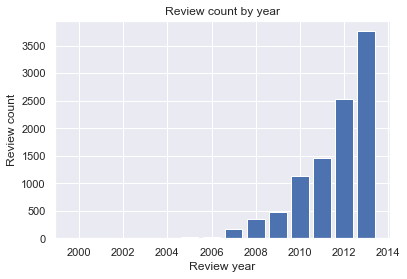

In [430]:
import matplotlib.pyplot as plt
plt.title('Review count by year')
plt.xlabel('Review year')
plt.ylabel('Review count')
x = [i for i in range(2000,2014,1)]
plt.bar(x,d)
plt.show()
#sns.set()

In [3]:
corr = dataset.corr()

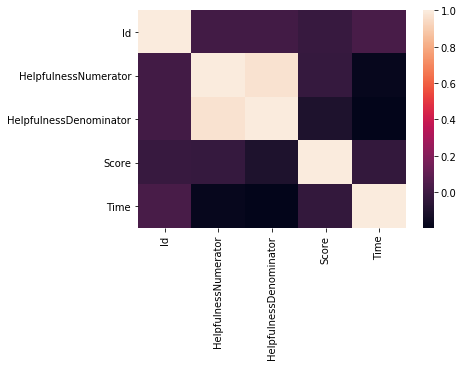

In [5]:
sns.heatmap(corr)